## Are the top tier countries identified in Q1 all rounders or specific to a weight or sex?
### Analysis specific to sex

Imports

In [1]:
import pandas as pd
import chardet
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Data ingestion

In [2]:
rankings = 'data/wkf_rankings.csv'
rankings_df = pd.read_csv(rankings)

Dropping 'id' and fixing time column data type

In [3]:
rankings_df.drop('_id', axis=1, inplace=True)
rankings_df['date']= pd.to_datetime(rankings_df['date'])

## Dropping the data after world pandemic travel restrictions

On March 11th 2020 a global pandemic was declared by the World Health Organisation (WHO) in light of the spread of the COVID-19 coronavirus. This subsequently caused many countries to impose travel restrictions and cancel events to prevent the spread.

As a result of this, data from events AFTER March 11 2020 will be removed as it cannot be gaurenteed that it is consistent with the rest of the data from periods with no travel restrictions and athletes not having the same preperation and training facilities.

In [4]:
rankings_df = rankings_df[rankings_df['date'] <= '2020-03-11']

Get rid of whitespace values

In [5]:
rankings_df.replace(u'\xa0',u'', regex=True, inplace=True)

In [6]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116599 entries, 0 to 119807
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ranking_country     116599 non-null  object        
 1   ranking_competitor  116599 non-null  object        
 2   date                116599 non-null  datetime64[ns]
 3   event               116599 non-null  object        
 4   type                116599 non-null  object        
 5   category            116599 non-null  object        
 6   event_factor        116599 non-null  float64       
 7   rank                116599 non-null  object        
 8   matches_won         116599 non-null  float64       
 9   points              116599 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.8+ MB


Bring in only the countries identified as top tier from Q1 notebook.

In [7]:
top_tier_df = rankings_df.loc[(rankings_df['ranking_country'] == 'FRA') |
                              (rankings_df['ranking_country'] == 'JPN') |
                              (rankings_df['ranking_country'] == 'EGY') |
                              (rankings_df['ranking_country'] == 'IRI') |
                              (rankings_df['ranking_country'] == 'ITA') |
                              (rankings_df['ranking_country'] == 'TUR') |
                              (rankings_df['ranking_country'] == 'GER')]
top_tier_df = top_tier_df.reset_index()
top_tier_df

,index,ranking_country,ranking_competitor,date,event,type,category,event_factor,rank,matches_won,points
0,29468,EGY,EGY2113,2019-03-01,Karate1 Series A - Salzburg 2019(AUT),Karate1 Series A,Female Kumite -61 kg,3.0,Participation,0.0,15.0
1,29469,EGY,EGY2113,2015-02-28,Karate1 Premier League - Sharm El Sheikh 2015 ...,Karate1 Premier League,Female Kumite -61 kg,4.0,Participation,0.0,16.0
2,29470,EGY,EGY2279,2016-02-27,Karate1 Premier League - Sharm El Sheikh 2016(...,Karate1 Premier League,Female Kata,4.0,Participation,0.0,20.0
3,29471,EGY,EGY2321,2016-02-27,Karate1 Premier League - Sharm El Sheikh 2016(...,Karate1 Premier League,Male Kata,4.0,Participation,0.0,20.0
4,29472,EGY,EGY2140,2015-02-28,Karate1 Premier League - Sharm El Sheikh 2015 ...,Karate1 Premier League,Male Kumite -67 kg,4.0,Participation,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
24309,111980,TUR,TUR2355,2017-09-23,Karate1 Series A - Istanbul 2017(TUR),Karate1 Series A,Female Kumite -55 Kg,3.0,Participation,0.0,15.0
24310,111981,TUR,TUR2355,2016-09-03,Karate1 Premier League - Istanbul 2016(TUR),Karate1 Premier League,Female Kumite -55 Kg,4.0,5th Place,3.0,220.0
24311,111982,TUR,TUR2355,2016-01-22,Karate1 Premier League - Paris 2016(FRA),Karate1 Premier League,Female Kumite -55 Kg,4.0,7th Place,2.0,140.0
24312,111983,TUR,TUR2572,2016-09-03,Karate1 Premier League - Istanbul 2016(TUR),Karate1 Premier League,Female Kumite -61 kg,4.0,9th Place,0.0,40.0


Drop the kata

In [8]:
kata_data = top_tier_df[top_tier_df['category'].str.contains("Kata")].index
top_tier_df.drop(kata_data, inplace = True)
top_tier_df = top_tier_df.reset_index(drop = True)

In [9]:
top_tier_df = top_tier_df.loc[(top_tier_df['event_factor'] == 6.0)]
top_tier_df = top_tier_df.reset_index()
top_tier_df

,level_0,index,ranking_country,ranking_competitor,date,event,type,category,event_factor,rank,matches_won,points
0,30,29501,EGY,EGY2218,2020-02-28,Karate1 Premier League - Salzburg 2020(AUT),Karate1 Premier League,Male Kumite -75 Kg,6.0,Participation,0.0,30.0
1,31,29502,EGY,EGY2218,2020-02-14,Karate1 Premier League - Dubai 2020(UAE),Karate1 Premier League,Male Kumite -75 Kg,6.0,3rd Place,5.0,570.0
2,32,29503,EGY,EGY2218,2020-02-07,UFAK Junior & Senior Championships - Tangier 2...,Continental Championship,Male Kumite -75 Kg,6.0,1st Place,4.0,870.0
3,33,29504,EGY,EGY2218,2020-01-24,Karate1 Premier League - Paris 2020(FRA),Karate1 Premier League,Male Kumite -75 Kg,6.0,Participation,3.0,210.0
4,35,29506,EGY,EGY2218,2019-11-29,Karate1 Premier League - Madrid 2019(ESP),Karate1 Premier League,Male Kumite -75 Kg,6.0,Participation,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4902,18260,111958,TUR,TUR2130,2013-02-08,40th EKF Junior&Cadet Karate Champ. 5th Under ...,Continental Championship,Junior Kumite Male 76+ kg,6.0,1st Place,6.0,732.0
4903,18263,111961,TUR,TUR2312,2016-02-05,"43rd EKF Junior, Cadet and U21 Championships(CYP)",Continental Championship,Junior Kumite Male -68 kg,6.0,3rd Place,5.0,570.0
4904,18272,111970,TUR,TUR193,2003-02-14,30th European Cadet & Junior Karate Championsh...,Continental Championship,Junior Kumite Female -53 kg,6.0,Participation,0.0,24.0
4905,18273,111971,TUR,TUR2674,2020-02-07,47th EKF Junior & Cadet and U21 Championships ...,Continental Championship,Junior Kumite Male -68 kg,6.0,1st Place,6.0,990.0


In [10]:
top_tier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   level_0             4907 non-null   int64         
 1   index               4907 non-null   int64         
 2   ranking_country     4907 non-null   object        
 3   ranking_competitor  4907 non-null   object        
 4   date                4907 non-null   datetime64[ns]
 5   event               4907 non-null   object        
 6   type                4907 non-null   object        
 7   category            4907 non-null   object        
 8   event_factor        4907 non-null   float64       
 9   rank                4907 non-null   object        
 10  matches_won         4907 non-null   float64       
 11  points              4907 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 460.2+ KB


In [11]:
top_tier_df = top_tier_df.drop(['level_0','index'], axis=1)

In [12]:
top_tier_df.head()

,ranking_country,ranking_competitor,date,event,type,category,event_factor,rank,matches_won,points
0,EGY,EGY2218,2020-02-28,Karate1 Premier League - Salzburg 2020(AUT),Karate1 Premier League,Male Kumite -75 Kg,6.0,Participation,0.0,30.0
1,EGY,EGY2218,2020-02-14,Karate1 Premier League - Dubai 2020(UAE),Karate1 Premier League,Male Kumite -75 Kg,6.0,3rd Place,5.0,570.0
2,EGY,EGY2218,2020-02-07,UFAK Junior & Senior Championships - Tangier 2...,Continental Championship,Male Kumite -75 Kg,6.0,1st Place,4.0,870.0
3,EGY,EGY2218,2020-01-24,Karate1 Premier League - Paris 2020(FRA),Karate1 Premier League,Male Kumite -75 Kg,6.0,Participation,3.0,210.0
4,EGY,EGY2218,2019-11-29,Karate1 Premier League - Madrid 2019(ESP),Karate1 Premier League,Male Kumite -75 Kg,6.0,Participation,1.0,90.0


Since beginging of 2015

In [13]:
top_tier_df = top_tier_df.loc[(top_tier_df['date'] > '2018-01-01')]
top_tier_df = top_tier_df.reset_index()

In [14]:
top_tier_df['type'].unique()

array(['Karate1 Premier League', 'Continental Championship'], dtype=object)

In [15]:
top_tier_df.groupby(['date','event']).size().reset_index().rename(columns={0:'count'})

,date,event,count
0,2018-01-26,Karate1 Premier League - Paris 2018(FRA),172
1,2018-02-02,45th EKF Junior & Cadet and U21 Championships(...,95
2,2018-02-16,Karate1 Premier League - Dubai 2018(UAE),133
3,2018-03-16,Karate1 Premier League - Rotterdam 2018(NED),137
4,2018-04-06,Karate1 Premier League - Rabat 2018(MAR),87
5,2018-05-06,"17TH AKF CADET, JUNIOR AND U21 CHAMPIONSHIP 20...",43
6,2018-05-10,53rd EKF Senior Championships(SRB),39
7,2018-06-08,Karate1 Premier League - Istanbul 2018(TUR),133
8,2018-06-13,32nd Pan American Senior Karate Championship S...,2
9,2018-07-08,15TH AKF SENIOR CHAMPIONSHIP 2018(JOR),20


Open up the criteria to be only K1 events. K1 events are international events used as qaulifiers for larger world championships.

In [64]:
top_tier_df = top_tier_df.loc[(top_tier_df['type'] == 'Karate1 Premier League') |
                           (top_tier_df['type'] == 'World Championship')]
# OR 'World Championship' not required as only event factor 6 events are in the dataframe /facepalm
top_tier_df = top_tier_df.reset_index()

Dump U21 data because it is isn't consistent.

In [17]:
u21_df = top_tier_df[top_tier_df['category'].str.contains("U21")].index
top_tier_df.drop(u21_df, inplace = True)

junior_df = top_tier_df[top_tier_df['category'].str.contains("Junior")].index
top_tier_df.drop(junior_df, inplace = True)

cadet_df = top_tier_df[top_tier_df['category'].str.contains("Cadet")].index
top_tier_df.drop(cadet_df, inplace = True)

top_tier_df = top_tier_df.reset_index(drop = True)

In [18]:
top_tier_df['category'].unique()

array(['Male Kumite -75 Kg', 'Female Kumite -68 kg', 'Male Kumite -67 kg',
       'Female Kumite -55 Kg', 'Male Kumite -60 Kg',
       'Female Kumite 68+ kg', 'Male Kumite 84+ kg', 'Male Kumite -84 kg',
       'Female Kumite -61 kg', 'Female Kumite -50 Kg'], dtype=object)

In [19]:
top_tier_df.groupby(['date','event']).size().reset_index().rename(columns={0:'count'})

,date,event,count
0,2018-01-26,Karate1 Premier League - Paris 2018(FRA),172
1,2018-02-16,Karate1 Premier League - Dubai 2018(UAE),133
2,2018-03-16,Karate1 Premier League - Rotterdam 2018(NED),137
3,2018-04-06,Karate1 Premier League - Rabat 2018(MAR),87
4,2018-06-08,Karate1 Premier League - Istanbul 2018(TUR),133
5,2018-09-14,Karate1 Premier League - Berlin 2018(GER),165
6,2018-10-12,Karate1 Premier League - Tokyo 2018(JPN),107
7,2019-01-25,Karate1 Premier League - Paris 2019(FRA),172
8,2019-02-15,Karate1 Premier League - Dubai 2019 (UAE),147
9,2019-04-19,Karate1 Premier League - Rabat 2019(MAR),146


So we've ended up removing the U21, cadet and junior data which was what the other event factor 6 data that included

In [20]:
top_tier_df['rank'].unique()

array(['Participation', '3rd Place', '7th Place', '2nd Place',
       '1st Place', '5th Place', '9th Place', '11th Place'], dtype=object)

Add a column denoting if a competitor 'medalled' rather than cluttering the resulting figures with too many ranks.

In [21]:
top_tier_df = top_tier_df.rename(columns={"rank": "Medalled"})

top_tier_df.replace({'Medalled':{'Participation': False,
                                  '7th Place': False,
                                  '5th Place': False,
                                  '9th Place': False,
                                  '11th Place': False,
                                  '1st Place': True,
                                  '2nd Place': True,
                                  '3rd Place': True
                                 }},inplace = True)

In [22]:
top_tier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   level_0             2185 non-null   int64         
 1   index               2185 non-null   int64         
 2   ranking_country     2185 non-null   object        
 3   ranking_competitor  2185 non-null   object        
 4   date                2185 non-null   datetime64[ns]
 5   event               2185 non-null   object        
 6   type                2185 non-null   object        
 7   category            2185 non-null   object        
 8   event_factor        2185 non-null   float64       
 9   Medalled            2185 non-null   bool          
 10  matches_won         2185 non-null   float64       
 11  points              2185 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 190.0+ KB


In [23]:
top_tier_df = top_tier_df.drop(['level_0','index'], axis=1)

### Categorising complete for counts per category and sex

In [24]:
tt_gender_df = top_tier_df.copy()

In [25]:
tt_gender_df

,ranking_country,ranking_competitor,date,event,type,category,event_factor,Medalled,matches_won,points
0,EGY,EGY2218,2020-02-28,Karate1 Premier League - Salzburg 2020(AUT),Karate1 Premier League,Male Kumite -75 Kg,6.0,False,0.0,30.0
1,EGY,EGY2218,2020-02-14,Karate1 Premier League - Dubai 2020(UAE),Karate1 Premier League,Male Kumite -75 Kg,6.0,True,5.0,570.0
2,EGY,EGY2218,2020-01-24,Karate1 Premier League - Paris 2020(FRA),Karate1 Premier League,Male Kumite -75 Kg,6.0,False,3.0,210.0
3,EGY,EGY2218,2019-11-29,Karate1 Premier League - Madrid 2019(ESP),Karate1 Premier League,Male Kumite -75 Kg,6.0,False,1.0,90.0
4,EGY,EGY2218,2019-09-06,Karate1 Premier League - Tokyo 2019 (JPN),Karate1 Premier League,Male Kumite -75 Kg,6.0,False,2.0,150.0
...,...,...,...,...,...,...,...,...,...,...
2180,TUR,TUR505,2018-02-16,Karate1 Premier League - Dubai 2018(UAE),Karate1 Premier League,Male Kumite 84+ kg,6.0,False,4.0,450.0
2181,TUR,TUR505,2018-01-26,Karate1 Premier League - Paris 2018(FRA),Karate1 Premier League,Male Kumite 84+ kg,6.0,False,0.0,30.0
2182,TUR,TUR2130,2018-06-08,Karate1 Premier League - Istanbul 2018(TUR),Karate1 Premier League,Male Kumite -67 kg,6.0,False,1.0,90.0
2183,TUR,TUR2130,2018-03-16,Karate1 Premier League - Rotterdam 2018(NED),Karate1 Premier League,Male Kumite -67 kg,6.0,False,1.0,90.0


Get rid of points column as not required.

In [26]:
tt_gender_df = tt_gender_df.drop(['points'], axis=1)

Check category names to intentify female and male entrants and rename.

In [27]:
tt_gender_df['category'].unique()

array(['Male Kumite -75 Kg', 'Female Kumite -68 kg', 'Male Kumite -67 kg',
       'Female Kumite -55 Kg', 'Male Kumite -60 Kg',
       'Female Kumite 68+ kg', 'Male Kumite 84+ kg', 'Male Kumite -84 kg',
       'Female Kumite -61 kg', 'Female Kumite -50 Kg'], dtype=object)

In [28]:
tt_gender_df.replace({'category':{"Female Kumite -68 kg": 'Female',
                                  "Female Kumite -55 Kg": 'Female',
                                  "Female Kumite 68+ kg": 'Female',
                                  "Female Kumite -61 kg": 'Female',
                                  "Female Kumite -50 Kg": 'Female',
                                  "Male Kumite -60 Kg": 'Male',
                                 "Male Kumite -67 kg": 'Male',
                                 "Male Kumite -75 Kg": 'Male',
                                 "Male Kumite -84 kg": 'Male',
                                 "Male Kumite 84+ kg": 'Male'}},inplace = True)

Check that all have been replaced

In [29]:
tt_gender_df['category'].unique()

array(['Male', 'Female'], dtype=object)

Drop unnecessary columns.

In [30]:
tt_gender_df = tt_gender_df.drop(['matches_won','event_factor','type','date','ranking_competitor'], axis=1)

Split male and female dataframes.

In [31]:
male_tt_df = tt_gender_df.loc[(tt_gender_df['category'] == 'Male')]
male_tt_df = male_tt_df.drop(['category'], axis=1)
male_tt_df = male_tt_df.reset_index(drop=True)

male_tt_df

,ranking_country,event,Medalled
0,EGY,Karate1 Premier League - Salzburg 2020(AUT),False
1,EGY,Karate1 Premier League - Dubai 2020(UAE),True
2,EGY,Karate1 Premier League - Paris 2020(FRA),False
3,EGY,Karate1 Premier League - Madrid 2019(ESP),False
4,EGY,Karate1 Premier League - Tokyo 2019 (JPN),False
...,...,...,...
1158,TUR,Karate1 Premier League - Dubai 2018(UAE),False
1159,TUR,Karate1 Premier League - Paris 2018(FRA),False
1160,TUR,Karate1 Premier League - Istanbul 2018(TUR),False
1161,TUR,Karate1 Premier League - Rotterdam 2018(NED),False


In [32]:
female_tt_df = tt_gender_df.loc[(tt_gender_df['category'] == 'Female')]
female_tt_df = female_tt_df.drop(['category'], axis=1)
female_tt_df = female_tt_df.reset_index(drop=True)

female_tt_df

,ranking_country,event,Medalled
0,EGY,Karate1 Premier League - Salzburg 2020(AUT),True
1,EGY,Karate1 Premier League - Dubai 2020(UAE),True
2,EGY,Karate1 Premier League - Paris 2020(FRA),True
3,EGY,Karate1 Premier League - Madrid 2019(ESP),False
4,EGY,Karate1 Premier League - Tokyo 2019 (JPN),False
...,...,...,...
1017,TUR,Karate1 Premier League - Istanbul 2018(TUR),False
1018,TUR,Karate1 Premier League - Rabat 2018(MAR),False
1019,TUR,Karate1 Premier League - Rotterdam 2018(NED),True
1020,TUR,Karate1 Premier League - Dubai 2018(UAE),False


In [33]:
male_tt_df = male_tt_df.groupby(['ranking_country','event','Medalled']).size().reset_index().rename(columns={0:'count'})
female_tt_df = female_tt_df.groupby(['ranking_country','event','Medalled']).size().reset_index().rename(columns={0:'count'})

## Check entry counts for the top tiers

Iran

In [34]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='IRI']
print(entry_count_male_df['count'].sum())

202


In [35]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='IRI']
print(entry_count_female_df['count'].sum())

95


Egypt

In [36]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='EGY']
print(entry_count_male_df['count'].sum())

90


In [37]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='EGY']
print(entry_count_female_df['count'].sum())

110


France

In [38]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='FRA']
print(entry_count_male_df['count'].sum())

249


In [39]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='FRA']
print(entry_count_female_df['count'].sum())

195


Germany

In [40]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='GER']
print(entry_count_male_df['count'].sum())

61


In [41]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='GER']
print(entry_count_female_df['count'].sum())

117


Italy

In [42]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='ITA']
print(entry_count_male_df['count'].sum())

217


In [43]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='ITA']
print(entry_count_female_df['count'].sum())

195


Japan

In [44]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='JPN']
print(entry_count_male_df['count'].sum())

185


In [45]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='JPN']
print(entry_count_female_df['count'].sum())

194


Turkey

In [46]:
entry_count_male_df = male_tt_df.loc[male_tt_df['ranking_country']=='TUR']
print(entry_count_male_df['count'].sum())

159


In [47]:
entry_count_female_df = female_tt_df.loc[female_tt_df['ranking_country']=='TUR']
print(entry_count_female_df['count'].sum())

116


In [48]:
male_tt_df.head()

,ranking_country,event,Medalled,count
0,EGY,Karate1 Premier League - Berlin 2018(GER),False,4
1,EGY,Karate1 Premier League - Dubai 2018(UAE),False,6
2,EGY,Karate1 Premier League - Dubai 2018(UAE),True,1
3,EGY,Karate1 Premier League - Dubai 2019 (UAE),False,10
4,EGY,Karate1 Premier League - Dubai 2020(UAE),False,6


In [49]:
no_medals_df = male_tt_df[male_tt_df['Medalled'] == False].index
male_tt_df.drop(no_medals_df, inplace = True)
male_tt_df = male_tt_df.reset_index(drop = True)
male_tt_df

,ranking_country,event,Medalled,count
0,EGY,Karate1 Premier League - Dubai 2018(UAE),True,1
1,EGY,Karate1 Premier League - Dubai 2020(UAE),True,1
2,EGY,Karate1 Premier League - Moscow 2019(RUS),True,1
3,EGY,Karate1 Premier League - Paris 2018(FRA),True,1
4,EGY,Karate1 Premier League - Paris 2019(FRA),True,1
...,...,...,...,...
84,TUR,Karate1 Premier League - Rotterdam 2018(NED),True,6
85,TUR,Karate1 Premier League - Salzburg 2020(AUT),True,3
86,TUR,Karate1 Premier League - Shanghai 2019(CHN),True,2
87,TUR,Karate1 Premier League - Tokyo 2018(JPN),True,3


In [50]:
no_medals_df = female_tt_df[female_tt_df['Medalled'] == False].index
female_tt_df.drop(no_medals_df, inplace = True)
female_tt_df = female_tt_df.reset_index(drop = True)
female_tt_df

,ranking_country,event,Medalled,count
0,EGY,Karate1 Premier League - Berlin 2018(GER),True,1
1,EGY,Karate1 Premier League - Dubai 2018(UAE),True,1
2,EGY,Karate1 Premier League - Dubai 2019 (UAE),True,4
3,EGY,Karate1 Premier League - Dubai 2020(UAE),True,5
4,EGY,Karate1 Premier League - Istanbul 2018(TUR),True,1
...,...,...,...,...
82,TUR,Karate1 Premier League - Rabat 2018(MAR),True,3
83,TUR,Karate1 Premier League - Rabat 2019(MAR),True,3
84,TUR,Karate1 Premier League - Rotterdam 2018(NED),True,3
85,TUR,Karate1 Premier League - Salzburg 2020(AUT),True,2


In [51]:
male_medaled_df = male_tt_df.pivot_table(index=['ranking_country'],columns=['event'],values='count').fillna(0)

In [52]:
female_medaled_df = female_tt_df.pivot_table(index=['ranking_country'],columns=['event'],values='count').fillna(0)

In [53]:
male_medaled_df["Total"] = male_medaled_df.sum(axis=1)
male_medaled_df = male_medaled_df.reset_index()
female_medaled_df["Total"] = female_medaled_df.sum(axis=1)
female_medaled_df = female_medaled_df.reset_index()

In [54]:
male_medaled_df

event,ranking_country,Karate1 Premier League - Berlin 2018(GER),Karate1 Premier League - Dubai 2018(UAE),Karate1 Premier League - Dubai 2019 (UAE),Karate1 Premier League - Dubai 2020(UAE),Karate1 Premier League - Istanbul 2018(TUR),Karate1 Premier League - Madrid 2019(ESP),Karate1 Premier League - Moscow 2019(RUS),Karate1 Premier League - Paris 2018(FRA),Karate1 Premier League - Paris 2019(FRA),Karate1 Premier League - Paris 2020(FRA),Karate1 Premier League - Rabat 2018(MAR),Karate1 Premier League - Rabat 2019(MAR),Karate1 Premier League - Rotterdam 2018(NED),Karate1 Premier League - Salzburg 2020(AUT),Karate1 Premier League - Shanghai 2019(CHN),Karate1 Premier League - Tokyo 2018(JPN),Karate1 Premier League - Tokyo 2019 (JPN),Total
0,EGY,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,2.0,1.0,0.0,0.0,16.0
1,FRA,1.0,1.0,3.0,3.0,0.0,3.0,3.0,4.0,2.0,4.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,32.0
2,GER,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
3,IRI,3.0,3.0,6.0,3.0,8.0,3.0,3.0,5.0,5.0,2.0,0.0,3.0,1.0,1.0,6.0,0.0,4.0,56.0
4,ITA,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,18.0
5,JPN,5.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,5.0,4.0,32.0
6,TUR,0.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,2.0,1.0,4.0,6.0,3.0,2.0,3.0,2.0,36.0


In [55]:
#male_medaled_df.plot.bar(x="ranking_country", y="Total", rot=70, title="Number of tourist visits - Year 2018")

Show distribution of K1 medals amongst top tier countries from Q1 for MALE.

(0.0, 60.0)

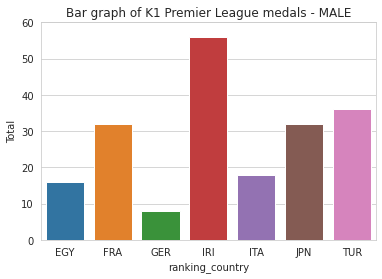

In [56]:
sns.set_style("whitegrid")
ax = sns.barplot(x="ranking_country", y="Total", data=male_medaled_df).set_title('Bar graph of K1 Premier League medals - MALE')
plt.ylim(0, 60)

In [57]:
female_medaled_df

event,ranking_country,Karate1 Premier League - Berlin 2018(GER),Karate1 Premier League - Dubai 2018(UAE),Karate1 Premier League - Dubai 2019 (UAE),Karate1 Premier League - Dubai 2020(UAE),Karate1 Premier League - Istanbul 2018(TUR),Karate1 Premier League - Madrid 2019(ESP),Karate1 Premier League - Moscow 2019(RUS),Karate1 Premier League - Paris 2018(FRA),Karate1 Premier League - Paris 2019(FRA),Karate1 Premier League - Paris 2020(FRA),Karate1 Premier League - Rabat 2018(MAR),Karate1 Premier League - Rabat 2019(MAR),Karate1 Premier League - Rotterdam 2018(NED),Karate1 Premier League - Salzburg 2020(AUT),Karate1 Premier League - Shanghai 2019(CHN),Karate1 Premier League - Tokyo 2018(JPN),Karate1 Premier League - Tokyo 2019 (JPN),Total
0,EGY,1.0,1.0,4.0,5.0,1.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,28.0
1,FRA,2.0,2.0,4.0,0.0,0.0,1.0,0.0,7.0,3.0,3.0,3.0,1.0,2.0,1.0,4.0,4.0,3.0,40.0
2,GER,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,10.0
3,IRI,0.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,19.0
4,ITA,3.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,14.0
5,JPN,5.0,1.0,0.0,0.0,3.0,1.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,1.0,2.0,6.0,4.0,40.0
6,TUR,2.0,1.0,1.0,3.0,2.0,2.0,1.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,0.0,29.0


In [58]:
#female_medaled_df.plot.bar(x="ranking_country", y="Total", rot=70, title="Number of tourist visits - Year 2018")

Show distribution of K1 medals amongst top tier countries from Q1 for FEMALE.

(0.0, 60.0)

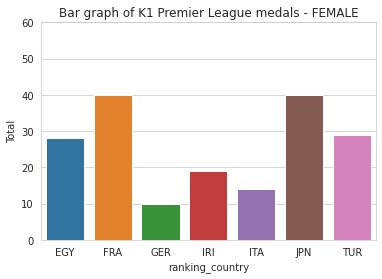

In [59]:
sns.set_style("whitegrid")
ax = sns.barplot(x="ranking_country", y="Total", data=female_medaled_df).set_title('Bar graph of K1 Premier League medals - FEMALE')
plt.ylim(0, 60)

In [60]:
male_medaled_df = male_medaled_df.T.reset_index()
male_medaled_df.columns = male_medaled_df.iloc[0]
male_medaled_df = male_medaled_df.rename(columns={"ranking_country": "Competitions"})
male_medaled_df = male_medaled_df.iloc[1:]
male_medaled_df

,Competitions,EGY,FRA,GER,IRI,ITA,JPN,TUR
1,Karate1 Premier League - Berlin 2018(GER),0.0,1.0,1.0,3.0,2.0,5.0,0.0
2,Karate1 Premier League - Dubai 2018(UAE),1.0,1.0,0.0,3.0,0.0,0.0,3.0
3,Karate1 Premier League - Dubai 2019 (UAE),0.0,3.0,0.0,6.0,1.0,2.0,2.0
4,Karate1 Premier League - Dubai 2020(UAE),1.0,3.0,1.0,3.0,2.0,0.0,1.0
5,Karate1 Premier League - Istanbul 2018(TUR),0.0,0.0,0.0,8.0,0.0,2.0,2.0
6,Karate1 Premier League - Madrid 2019(ESP),0.0,3.0,0.0,3.0,1.0,1.0,3.0
7,Karate1 Premier League - Moscow 2019(RUS),1.0,3.0,0.0,3.0,1.0,2.0,1.0
8,Karate1 Premier League - Paris 2018(FRA),1.0,4.0,1.0,5.0,0.0,2.0,1.0
9,Karate1 Premier League - Paris 2019(FRA),1.0,2.0,0.0,5.0,2.0,2.0,0.0
10,Karate1 Premier League - Paris 2020(FRA),1.0,4.0,1.0,2.0,2.0,1.0,2.0


Text(0.5, 0, 'Competitions')

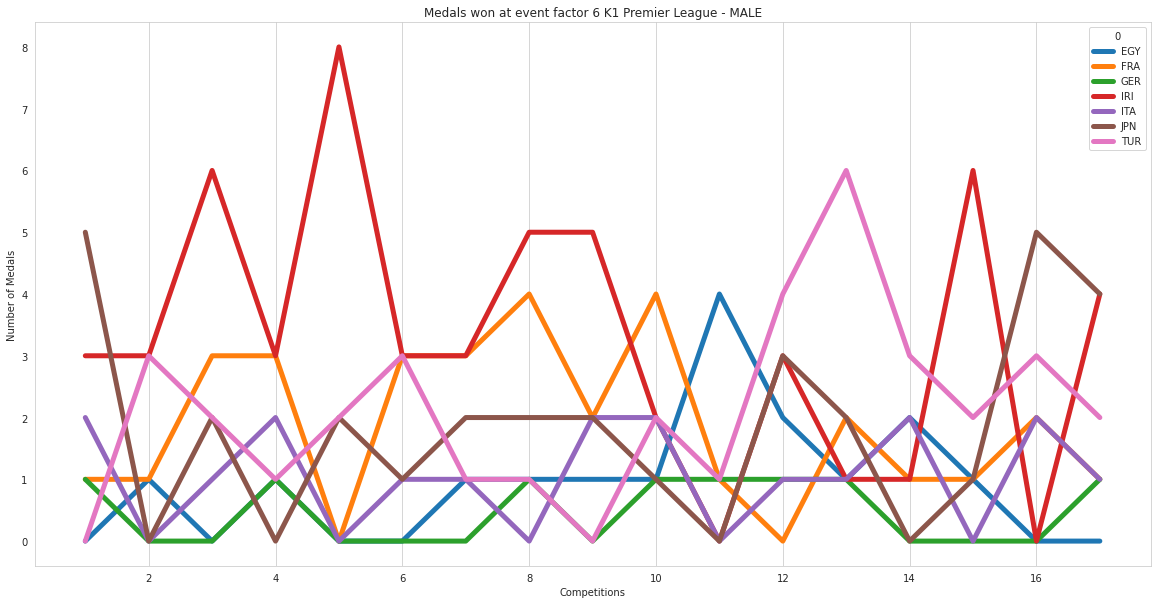

In [65]:
male_medaled_df[:-1].plot(figsize=(20,10), linewidth=5,
                    title='Medals won at event factor 6 K1 Premier League - MALE',).grid(axis='y')
plt.ylabel('Number of Medals')
plt.xlabel('Competitions')

In [62]:
female_medaled_df = female_medaled_df.T.reset_index()
female_medaled_df.columns = female_medaled_df.iloc[0]
female_medaled_df = female_medaled_df.rename(columns={"ranking_country": "Competitions"})
female_medaled_df = female_medaled_df.iloc[1:]
female_medaled_df

,Competitions,EGY,FRA,GER,IRI,ITA,JPN,TUR
1,Karate1 Premier League - Berlin 2018(GER),1.0,2.0,0.0,0.0,3.0,5.0,2.0
2,Karate1 Premier League - Dubai 2018(UAE),1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,Karate1 Premier League - Dubai 2019 (UAE),4.0,4.0,0.0,2.0,1.0,0.0,1.0
4,Karate1 Premier League - Dubai 2020(UAE),5.0,0.0,1.0,3.0,0.0,0.0,3.0
5,Karate1 Premier League - Istanbul 2018(TUR),1.0,0.0,1.0,1.0,2.0,3.0,2.0
6,Karate1 Premier League - Madrid 2019(ESP),2.0,1.0,0.0,1.0,1.0,1.0,2.0
7,Karate1 Premier League - Moscow 2019(RUS),0.0,0.0,1.0,2.0,0.0,3.0,1.0
8,Karate1 Premier League - Paris 2018(FRA),1.0,7.0,0.0,1.0,0.0,2.0,0.0
9,Karate1 Premier League - Paris 2019(FRA),2.0,3.0,2.0,0.0,1.0,5.0,2.0
10,Karate1 Premier League - Paris 2020(FRA),3.0,3.0,0.0,1.0,0.0,1.0,3.0


Text(0.5, 0, 'Competitions')

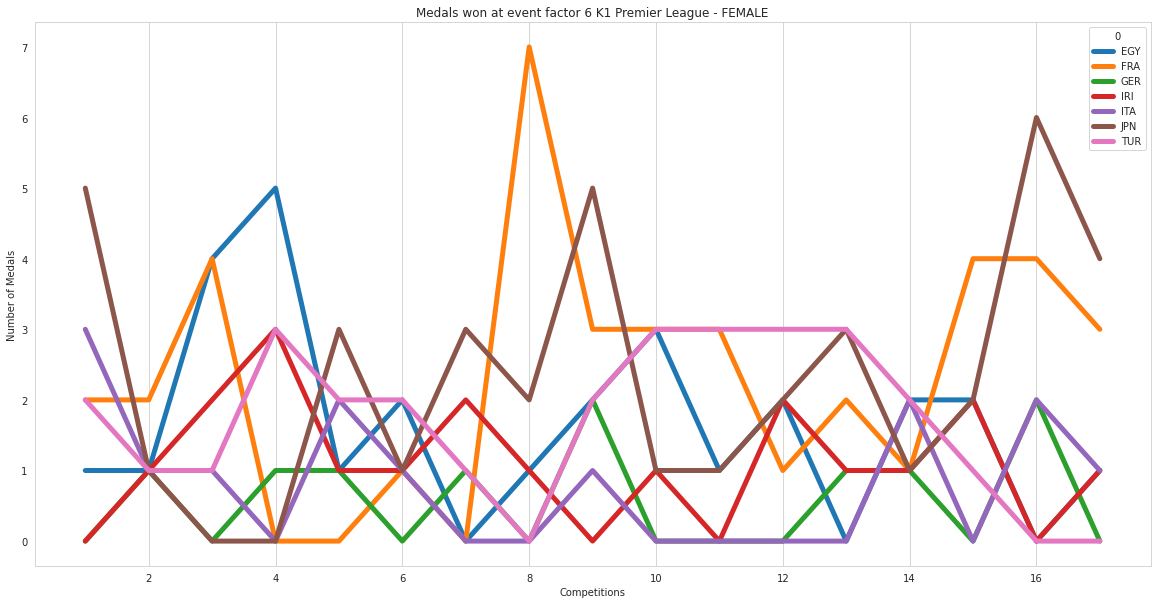

In [66]:
female_medaled_df[:-1].plot(figsize=(20,10), linewidth=5,
                    title='Medals won at event factor 6 K1 Premier League - FEMALE',).grid(axis='y')
plt.ylabel('Number of Medals')
plt.xlabel('Competitions')

Both of the figures for showing medals won across each compitition as a timeline are extremely messy and difficult to interpret so will be disregard for report.